In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot

In [2]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [3]:
frames = ed.input_file('../musicalrobot/data/8_15_19_Dodecanoic_acid.tiff')

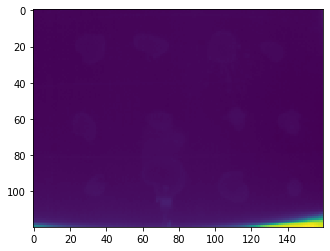

In [4]:
plt.imshow(frames[700])

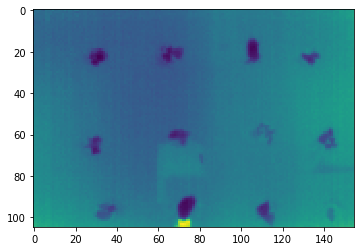

In [5]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[0:105,0:155])
plt.imshow(crop_frame[0])

In [6]:
flip_frames = ed.flip_frame(crop_frame)

In [7]:
labeled_samples = ed.edge_detection(flip_frames)

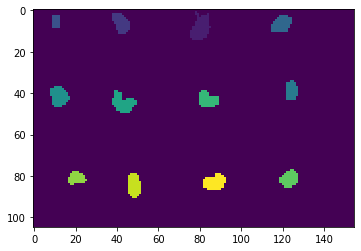

In [8]:
plt.imshow(labeled_samples)

In [83]:
from skimage.measure import regionprops
def regprop(labeled_samples,frames,n_samples,n_rows,n_columns):
    ''' Determines the area and centroid of all samples.
        Args:
        labeled_samples(array): An array with labeled samples.
        flip_frames (array) : Original intensity image to determine
        the intensity at sample centroids.
        n_samples: Number of samples in the video being analyzed.
        n_rows: Number of rows of sample
        n_columns: Number of columns of sample
        Returns:
        A dictionary of dataframe with information about samples in every
        frame of the video.
    '''
    regprops = {} 
    for i in range(len(frames)):
        props = regionprops(labeled_samples, intensity_image=frames[i])
        row = np.zeros(len(props)).astype(int)
        column = np.zeros(len(props)).astype(int)
        area = np.zeros(len(props))
        perim = np.zeros(len(props))
        intensity = np.zeros(len(props),dtype=np.float64)
        plate = np.zeros(len(props),dtype=np.float64)
        plate_coord = np.zeros(len(props))
        unique_index = np.zeros(len(props))
       
        c = 0
        for prop in props:
            row[c] = int(prop.centroid[0])
            column[c] = int(prop.centroid[1])
            #print(y[c])
            area[c] = prop.area
            perim[c] = prop.perimeter
            intensity[c] = frames[i][row[c]][column[c]]
            plate[c] = frames[i][row[c]][column[c]+10]
            plate_coord[c] = column[c]+10
            # Adding the row and column coordinates to get a unique index for each sample.
            unique_index[c] = row[c] + column[c]
            c = c + 1
         
        regprops[i] = pd.DataFrame({'Row': row, 'Column': column,'Plate':plate,'Plate_coord':plate_coord ,'Area': area,
                                'Perim': perim, 'Mean Intensity': intensity,'unique_index':unique_index},dtype=np.float64)
        if len(regprops[i]) != n_samples:
            print('Wrong number of samples are being detected in frame %d' %i)    
        regprops[i].sort_values(['Column','Row'],inplace=True)
    # After sorting the dataframe according by columns in ascending order.
    sorted_rows = []
    # Sorting the dataframe according to the row coordinate in each column.
    # The samples are pipetted out top to bottom from left to right.
    # The order of the samples in the dataframe should match the order of pipetting.
    for j in range(0,n_columns):
        df = regprops[0][j*n_rows:(j+1)*n_rows].sort_values(['Row'])
        sorted_rows.append(df)
    regprops[0] = pd.concat(sorted_rows)
    # Creating an index to be used for reordering all the dataframes. The unique index is the sum of
    # row and column coordinates.
    reorder_index = regprops[0].unique_index
    for k in range(0,len(regprops)):
        regprops[k].set_index('unique_index',inplace=True)
        regprops[k] = regprops[k].reindex(reorder_index)
    return regprops

In [84]:
regprops = regprop(labeled_samples,flip_frames
                      ,12,3,4)

In [85]:
regprops[4]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
unique_index,,,,,,,
15.0,5.0,10.0,30170.0,20.0,24.0,16.000000,30028.0
53.0,41.0,12.0,30087.0,22.0,74.0,30.142136,30003.0
101.0,81.0,20.0,30073.0,30.0,43.0,23.313708,29722.0
48.0,6.0,42.0,30107.0,52.0,64.0,28.727922,29722.0
86.0,44.0,42.0,30062.0,52.0,78.0,37.556349,29953.0
132.0,84.0,48.0,29997.0,58.0,60.0,27.899495,29596.0
88.0,8.0,80.0,30019.0,90.0,91.0,40.349242,29568.0
126.0,43.0,83.0,29902.0,93.0,60.0,29.071068,29692.0
169.0,82.0,87.0,29873.0,97.0,66.0,29.899495,29753.0


In [ ]:
# Order is same as the pipetting order followed by the opentrons robot
# The wells are filled column wise starting from the left most column. 
# The code to sort the dataframe according to the required order involves dataframe slicing
# and hence takes a lot of time.

In [29]:
pixel_frames = ed.input_file('../musicalrobot/data/CHCl_CA_DES_5_31_19.tiff')

In [30]:
image_eq = pa.image_eq(len(pixel_frames),pixel_frames)

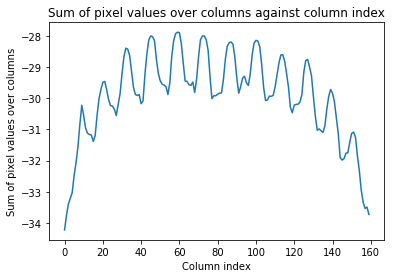

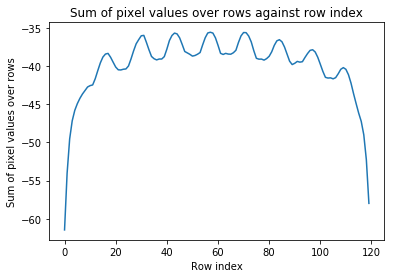

In [31]:
column_sum, row_sum = pa.pixel_sum(image_eq)

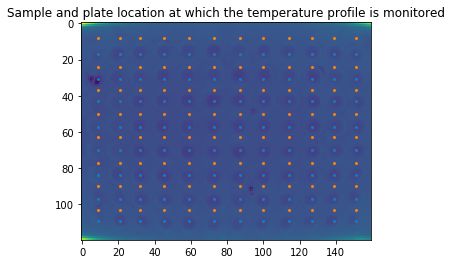

In [32]:
location = pa.peak_values(column_sum, row_sum, 12, 8, image_eq)

In [33]:
location

,Row,Column,plate_location
0,17,9,8
1,31,9,24
2,43,9,37
3,57,9,50
4,70,9,63
5,84,9,77
6,97,9,90
7,109,9,103
8,17,21,8
9,31,21,24
